In [4]:
import streamlit
from sklearn.datasets import fetch_openml
credit_approval = fetch_openml('credit-approval',version=1, as_frame=True)
df=credit_approval.frame

In [5]:
df.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   A1      678 non-null    category
 1   A2      678 non-null    float64 
 2   A3      690 non-null    float64 
 3   A4      684 non-null    category
 4   A5      684 non-null    category
 5   A6      681 non-null    category
 6   A7      681 non-null    category
 7   A8      690 non-null    float64 
 8   A9      690 non-null    category
 9   A10     690 non-null    category
 10  A11     690 non-null    int64   
 11  A12     690 non-null    category
 12  A13     690 non-null    category
 13  A14     677 non-null    float64 
 14  A15     690 non-null    int64   
 15  class   690 non-null    category
dtypes: category(10), float64(4), int64(2)
memory usage: 41.2 KB


In [6]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

A1: ['b', 'a', NaN]
Categories (2, object): ['a', 'b']
A2: [30.83 58.67 24.5  27.83 20.17 32.08 33.17 22.92 54.42 42.5  22.08 29.92
 38.25 48.08 45.83 36.67 28.25 23.25 21.83 19.17 25.   47.75 27.42 41.17
 15.83 47.   56.58 57.42 42.08 29.25 42.   49.5  36.75 22.58 27.25 23.
 27.75 54.58 34.17 28.92 29.67 39.58 56.42 54.33 41.   31.92 41.5  23.92
 25.75 26.   37.42 34.92 34.25 23.33 23.17 44.33 35.17 43.25 56.75 31.67
 23.42 20.42 26.67 36.   25.5  19.42 32.33 34.83 38.58 44.25 44.83 20.67
 34.08 21.67 21.5  49.58 27.67 39.83   nan 37.17 25.67 34.   49.   62.5
 31.42 52.33 28.75 28.58 22.5  28.5  37.5  35.25 18.67 54.83 40.92 19.75
 29.17 24.58 33.75 25.42 37.75 52.5  57.83 20.75 39.92 24.75 44.17 23.5
 47.67 22.75 34.42 28.42 67.75 47.42 36.25 32.67 48.58 33.58 18.83 26.92
 31.25 56.5  43.   22.33 32.83 40.33 30.5  52.83 46.67 58.33 37.33 23.08
 32.75 68.67 28.   44.   25.08 32.   60.58 40.83 19.33 41.33 56.   49.83
 22.67 27.   26.08 18.42 21.25 57.08 22.42 48.75 40.   40.58 28.67 33

In [7]:
print(df['class'].value_counts())

class
-    383
+    307
Name: count, dtype: int64


In [8]:
print(df.isnull().sum())

A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
class     0
dtype: int64


In [14]:
import pandas as pd
# Xử lý giá trị thiếu: tách ra từng trường hợp
for col in df.columns:
    if df[col].isnull().sum() > 0:
        try:
            # Nếu chuyển được sang số => dùng trung bình
            df[col] = pd.to_numeric(df[col], errors='raise')
            df[col].fillna(df[col].mean(), inplace=True)
        except:
            # Nếu không chuyển được => xử lý như object, dùng mode
            df[col].fillna(df[col].mode()[0], inplace=True)

In [15]:
print(df.isnull().sum())

A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
A15      0
class    0
dtype: int64


In [16]:
# Chuyển giá trị '+' thành 1, '-' thành 0 trong cột class
df['class'] = df['class'].apply(lambda x: 1 if x == '+' else 0)

# Nếu có các cột như A9, A10 là Yes/No, chuyển 't'/'f' thành 1/0
# Giả sử cột A9 và A10 có kiểu nhị phân t/f
binary_cols = ['A9', 'A10']  # thêm các cột khác nếu cần

for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 't' else 0)


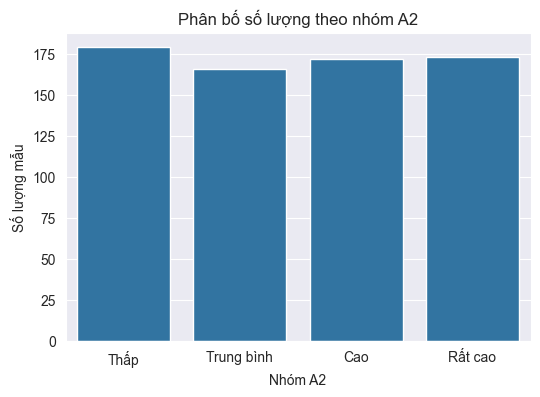

Giá trị trung bình (mean) của A2: 31.57
Giá trị trung vị (median) của A2: 28.625
Giá trị mode (giá trị xuất hiện nhiều nhất) của A2: 31.56817109144543


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chọn cột A2
col = 'A2'

# Cắt phân vị thành các nhóm theo tứ phân vị
df['A2_group'] = pd.qcut(df[col], q=4, labels=['Thấp', 'Trung bình', 'Cao', 'Rất cao'])

# Vẽ biểu đồ số lượng mỗi nhóm
plt.figure(figsize=(6,4))
sns.countplot(x='A2_group', data=df)
plt.title('Phân bố số lượng theo nhóm A2')
plt.xlabel('Nhóm A2')
plt.ylabel('Số lượng mẫu')
plt.show()

# Tính thống kê
mean_val = df[col].mean()
median_val = df[col].median()
mode_val = df[col].mode()[0]

print(f"Giá trị trung bình (mean) của A2: {mean_val:.2f}")
print(f"Giá trị trung vị (median) của A2: {median_val}")
print(f"Giá trị mode (giá trị xuất hiện nhiều nhất) của A2: {mode_val}")


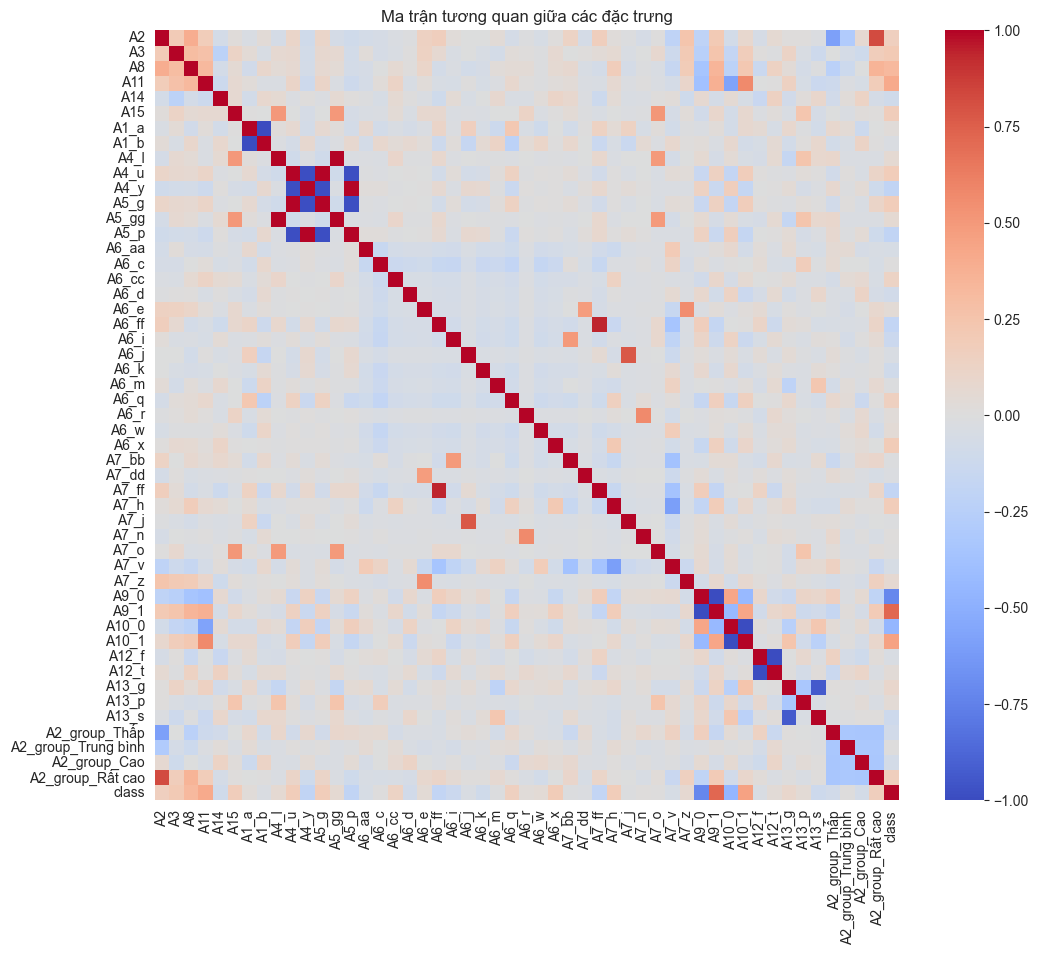

Các đặc trưng tương quan mạnh nhất với class:
A9_0    -0.720407
A9_1     0.720407
A10_0   -0.458301
A10_1    0.458301
A11      0.406410
A8       0.322475
A3       0.206294
A6_x     0.192945
A4_y    -0.188964
A5_p    -0.188964
Name: class, dtype: float64


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chuyển toàn bộ dữ liệu định danh thành số (nếu cần)
df_encoded = pd.get_dummies(df.drop(columns='class'))  # bỏ cột class để xử lý riêng
df_encoded['class'] = df['class']  # thêm lại class

# Tính ma trận tương quan
corr_matrix = df_encoded.corr()

# Vẽ heatmap tương quan
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Ma trận tương quan giữa các đặc trưng')
plt.show()

# In ra 10 đặc trưng tương quan mạnh nhất với class
corr_with_class = corr_matrix['class'].drop('class').sort_values(key=abs, ascending=False)
print("Các đặc trưng tương quan mạnh nhất với class:")
print(corr_with_class.head(10))


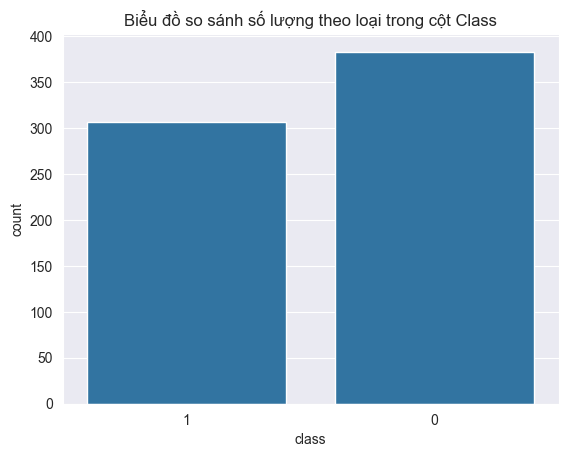

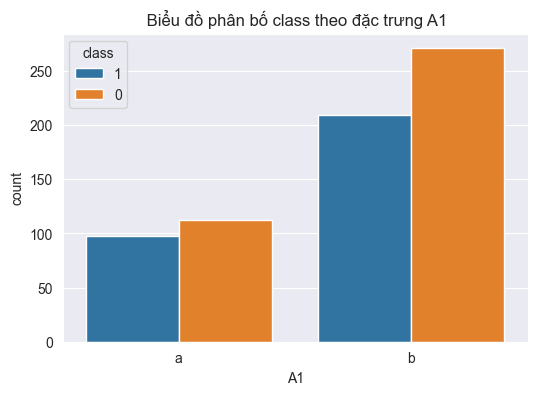

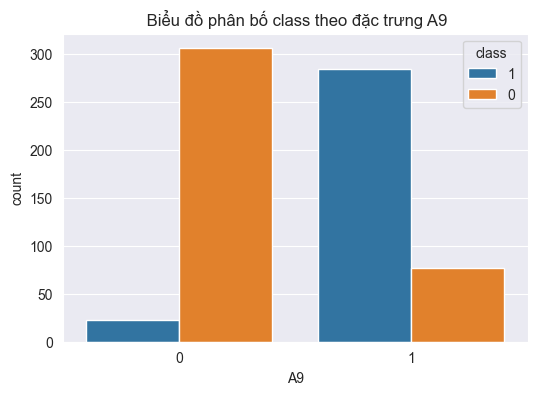

In [27]:
# Biểu đồ so sánh số lượng theo loại trong cột Class
sns.countplot(x='class', data=df)
plt.title('Biểu đồ so sánh số lượng theo loại trong cột Class')
plt.show()

# Thể hiện phân bố class theo đặc trưng phân loại (A1, A9)
cat_features = ['A1', 'A9']

for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='class', data=df)
    plt.title(f' Biểu đồ phân bố class theo đặc trưng {col}')
    plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Giả sử đã xử lý dữ liệu thiếu và mã hóa các biến nhị phân ở các câu trước
# Bây giờ mã hóa one-hot các biến phân loại khác
X = pd.get_dummies(df.drop(columns='class'), drop_first=True)
y = df['class']

# Chia tập huấn luyện và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [31]:
y_pred = model.predict(X_test_scaled)


Accuracy: 0.8188405797101449
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           57           11
Actual 1           14           56


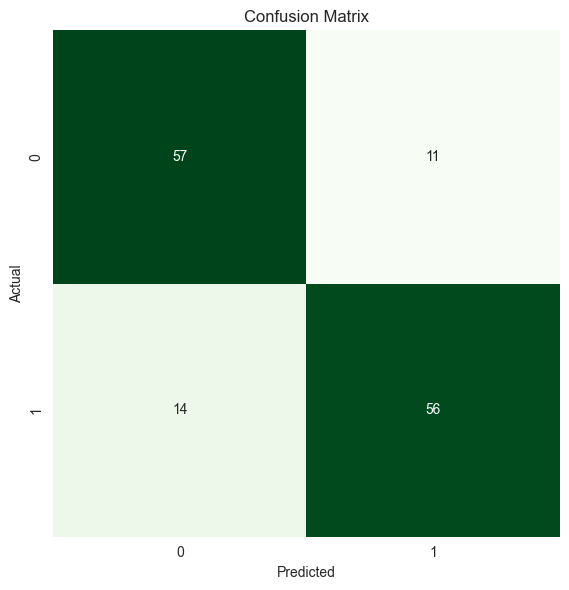

Đánh giá mô hình:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        68
           1       0.84      0.80      0.82        70

    accuracy                           0.82       138
   macro avg       0.82      0.82      0.82       138
weighted avg       0.82      0.82      0.82       138



In [33]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Precision, Recall, F1
report = classification_report(y_test, y_pred)
print("Đánh giá mô hình:\n", report)
